# This notebook is made for a live coding session

## Imports

In [1]:
# Data processing library
import pandas as pd 

# Directory and file manipulation library
import os 

# Numerical python for our mathematical functions
import numpy as np 

# As our primary Machine learning library
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# For Data Visualisation
import matplotlib.pyplot as plt

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

# Let's run this (CTRL + Enter)

"Finished importing libraries"

'Finished importing libraries'

## Let's define Our Directories and Files

In [2]:
BASE_DIR = "/kaggle/input"
DATA_DIR = os.path.join(BASE_DIR, 'fertility-data')

csv_file = os.path.join(DATA_DIR, 'FertilityData.csv')

f"Path to the initial file containing all the data: {csv_file}"

'Path to the initial file containing all the data: /kaggle/input/fertility-data/FertilityData.csv'

### Let's load the csv into our dataframe variable

In [11]:
data = pd.read_csv(csv_file)

In [12]:
data.head()

,Age,Dose,Seconds,Indicator1,Indicator2,Indicator3,Indicator4,Indicator5,Outcome
0,32,2250.0,9.0,1081.0,0.50,0.00,11.0,0,0
1,38,1800.0,8.0,578.0,0.20,0.20,9.1,1,0
2,41,3075.0,9.0,320.0,0.26,0.26,9.0,1,0
3,40,4500.0,10.0,364.0,0.38,0.38,7.3,1,0
4,35,1350.0,6.0,794.0,0.40,0.40,8.0,1,0


## Preprocessing

### How much null data do we have?

In [13]:
# Check for missing values in each column and calculate the sum
missing_value = data.isna().sum()

# Display the missing data for each column
missing_value

Age           0
Dose          1
Seconds       3
Indicator1    2
Indicator2    0
Indicator3    0
Indicator4    4
Indicator5    0
Outcome       0
dtype: int64

### Replacing them with the median

In [14]:
# Iterate over each column in the BHCG DataFrame
for column in data.columns:
    # Calculate the median of the column (ignoring NaN values)
    column_median = data[column].median()
    # Replace NaN values with the mean of the column
    data[column].fillna(column_median, inplace=True)    
print(f"Finished replacing the null values of each column with the median of that column")

Finished replacing the null values of each column with the median of that column


In [15]:
missing_data = data.isna().sum()

# Display the missing data for each column
print("Missing data for each column:")
print(missing_data)

Missing data for each column:
Age           0
Dose          0
Seconds       0
Indicator1    0
Indicator2    0
Indicator3    0
Indicator4    0
Indicator5    0
Outcome       0
dtype: int64


### Our data is now ready to use. Let's take a look at it

In [16]:
data.head()

,Age,Dose,Seconds,Indicator1,Indicator2,Indicator3,Indicator4,Indicator5,Outcome
0,32,2250.0,9.0,1081.0,0.50,0.00,11.0,0,0
1,38,1800.0,8.0,578.0,0.20,0.20,9.1,1,0
2,41,3075.0,9.0,320.0,0.26,0.26,9.0,1,0
3,40,4500.0,10.0,364.0,0.38,0.38,7.3,1,0
4,35,1350.0,6.0,794.0,0.40,0.40,8.0,1,0


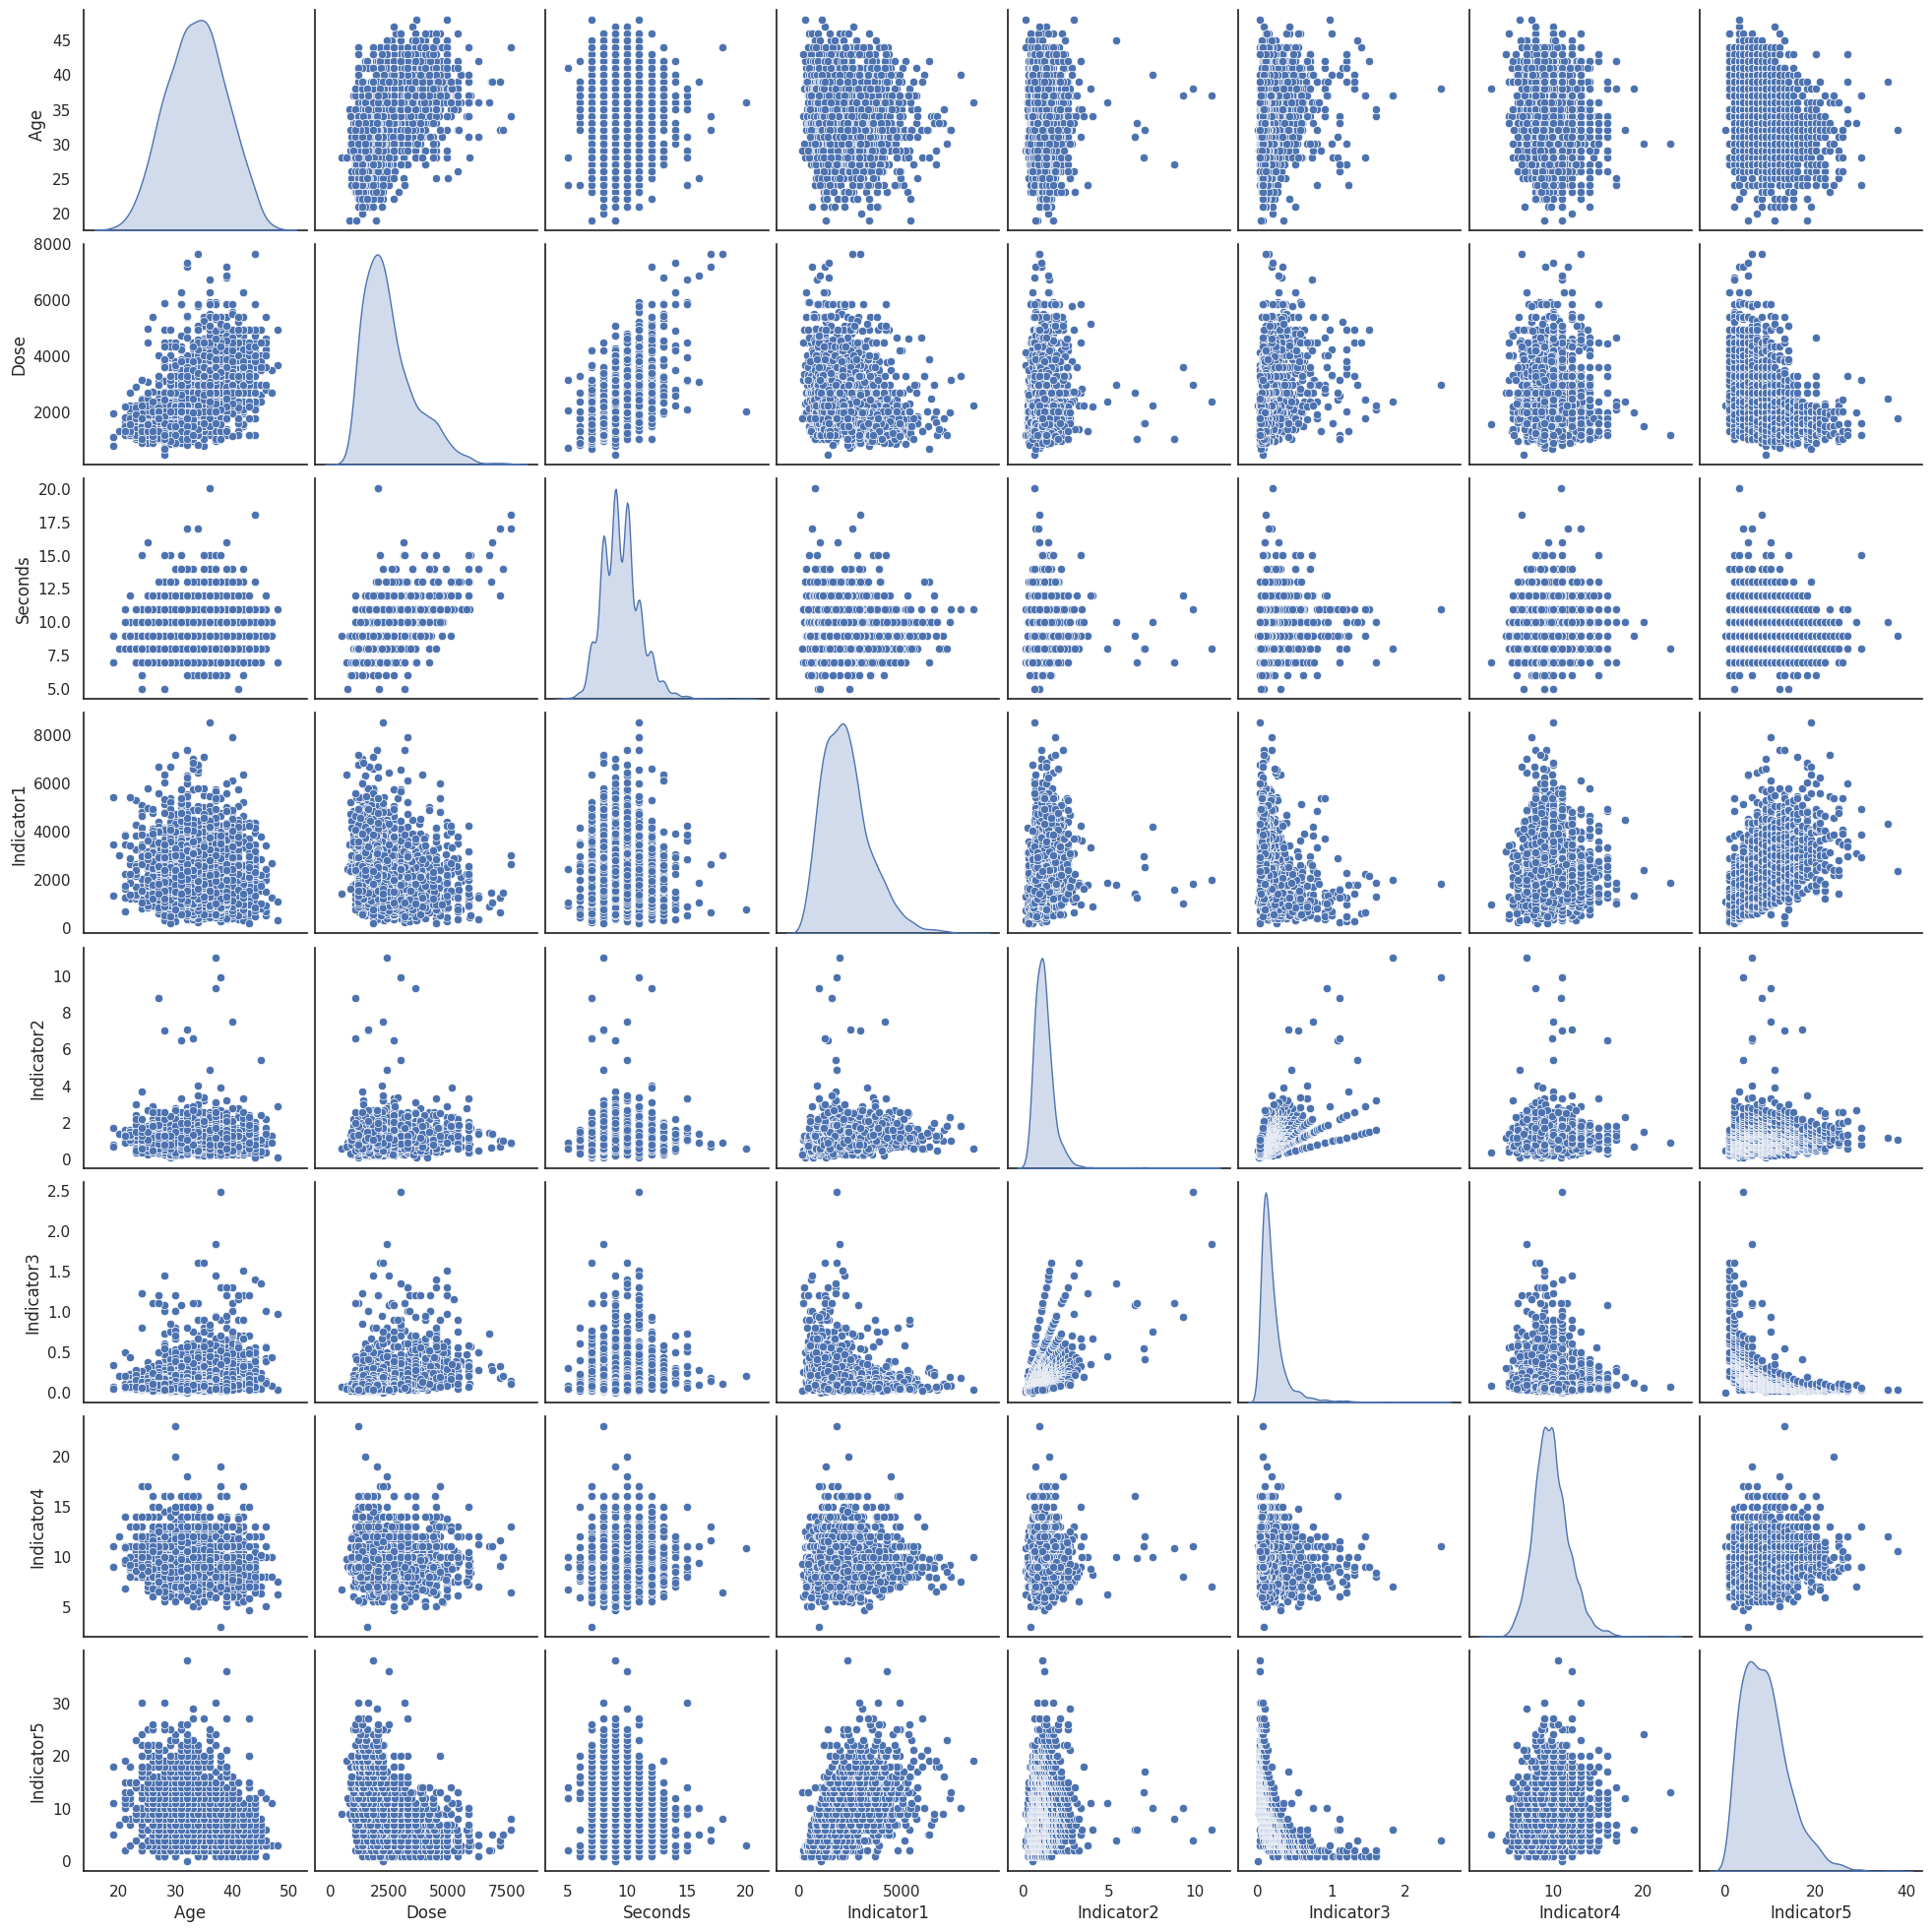

In [17]:
# Let's use our visualization libraries to visualize the correlation of our data
# Correlation basically shows us the relationship between the data

# Data without the output column
input_columns = data.columns[:-1]
columns = list(input_columns[0:])

# Create pair plot
sns.pairplot(data[columns], diag_kind='kde')

# First Feature Engineering Technique
## Normalizing the data using min-max scaling (z-score normalization) 

In [20]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data)

data = pd.DataFrame(normalized_data, columns=data.columns)
data.head()

,Age,Dose,Seconds,Indicator1,Indicator2,Indicator3,Indicator4,Indicator5,Outcome
0,0.448276,0.244755,0.266667,0.109740,0.037580,0.000000,0.400,0.000000,0.0
1,0.655172,0.181818,0.200000,0.049479,0.010082,0.080645,0.305,0.026316,0.0
2,0.758621,0.360140,0.266667,0.018570,0.015582,0.104839,0.300,0.026316,0.0
3,0.724138,0.559441,0.333333,0.023841,0.026581,0.153226,0.215,0.026316,0.0
4,0.551724,0.118881,0.066667,0.075356,0.028414,0.161290,0.250,0.026316,0.0


### Let's show the correlation of this scaled data

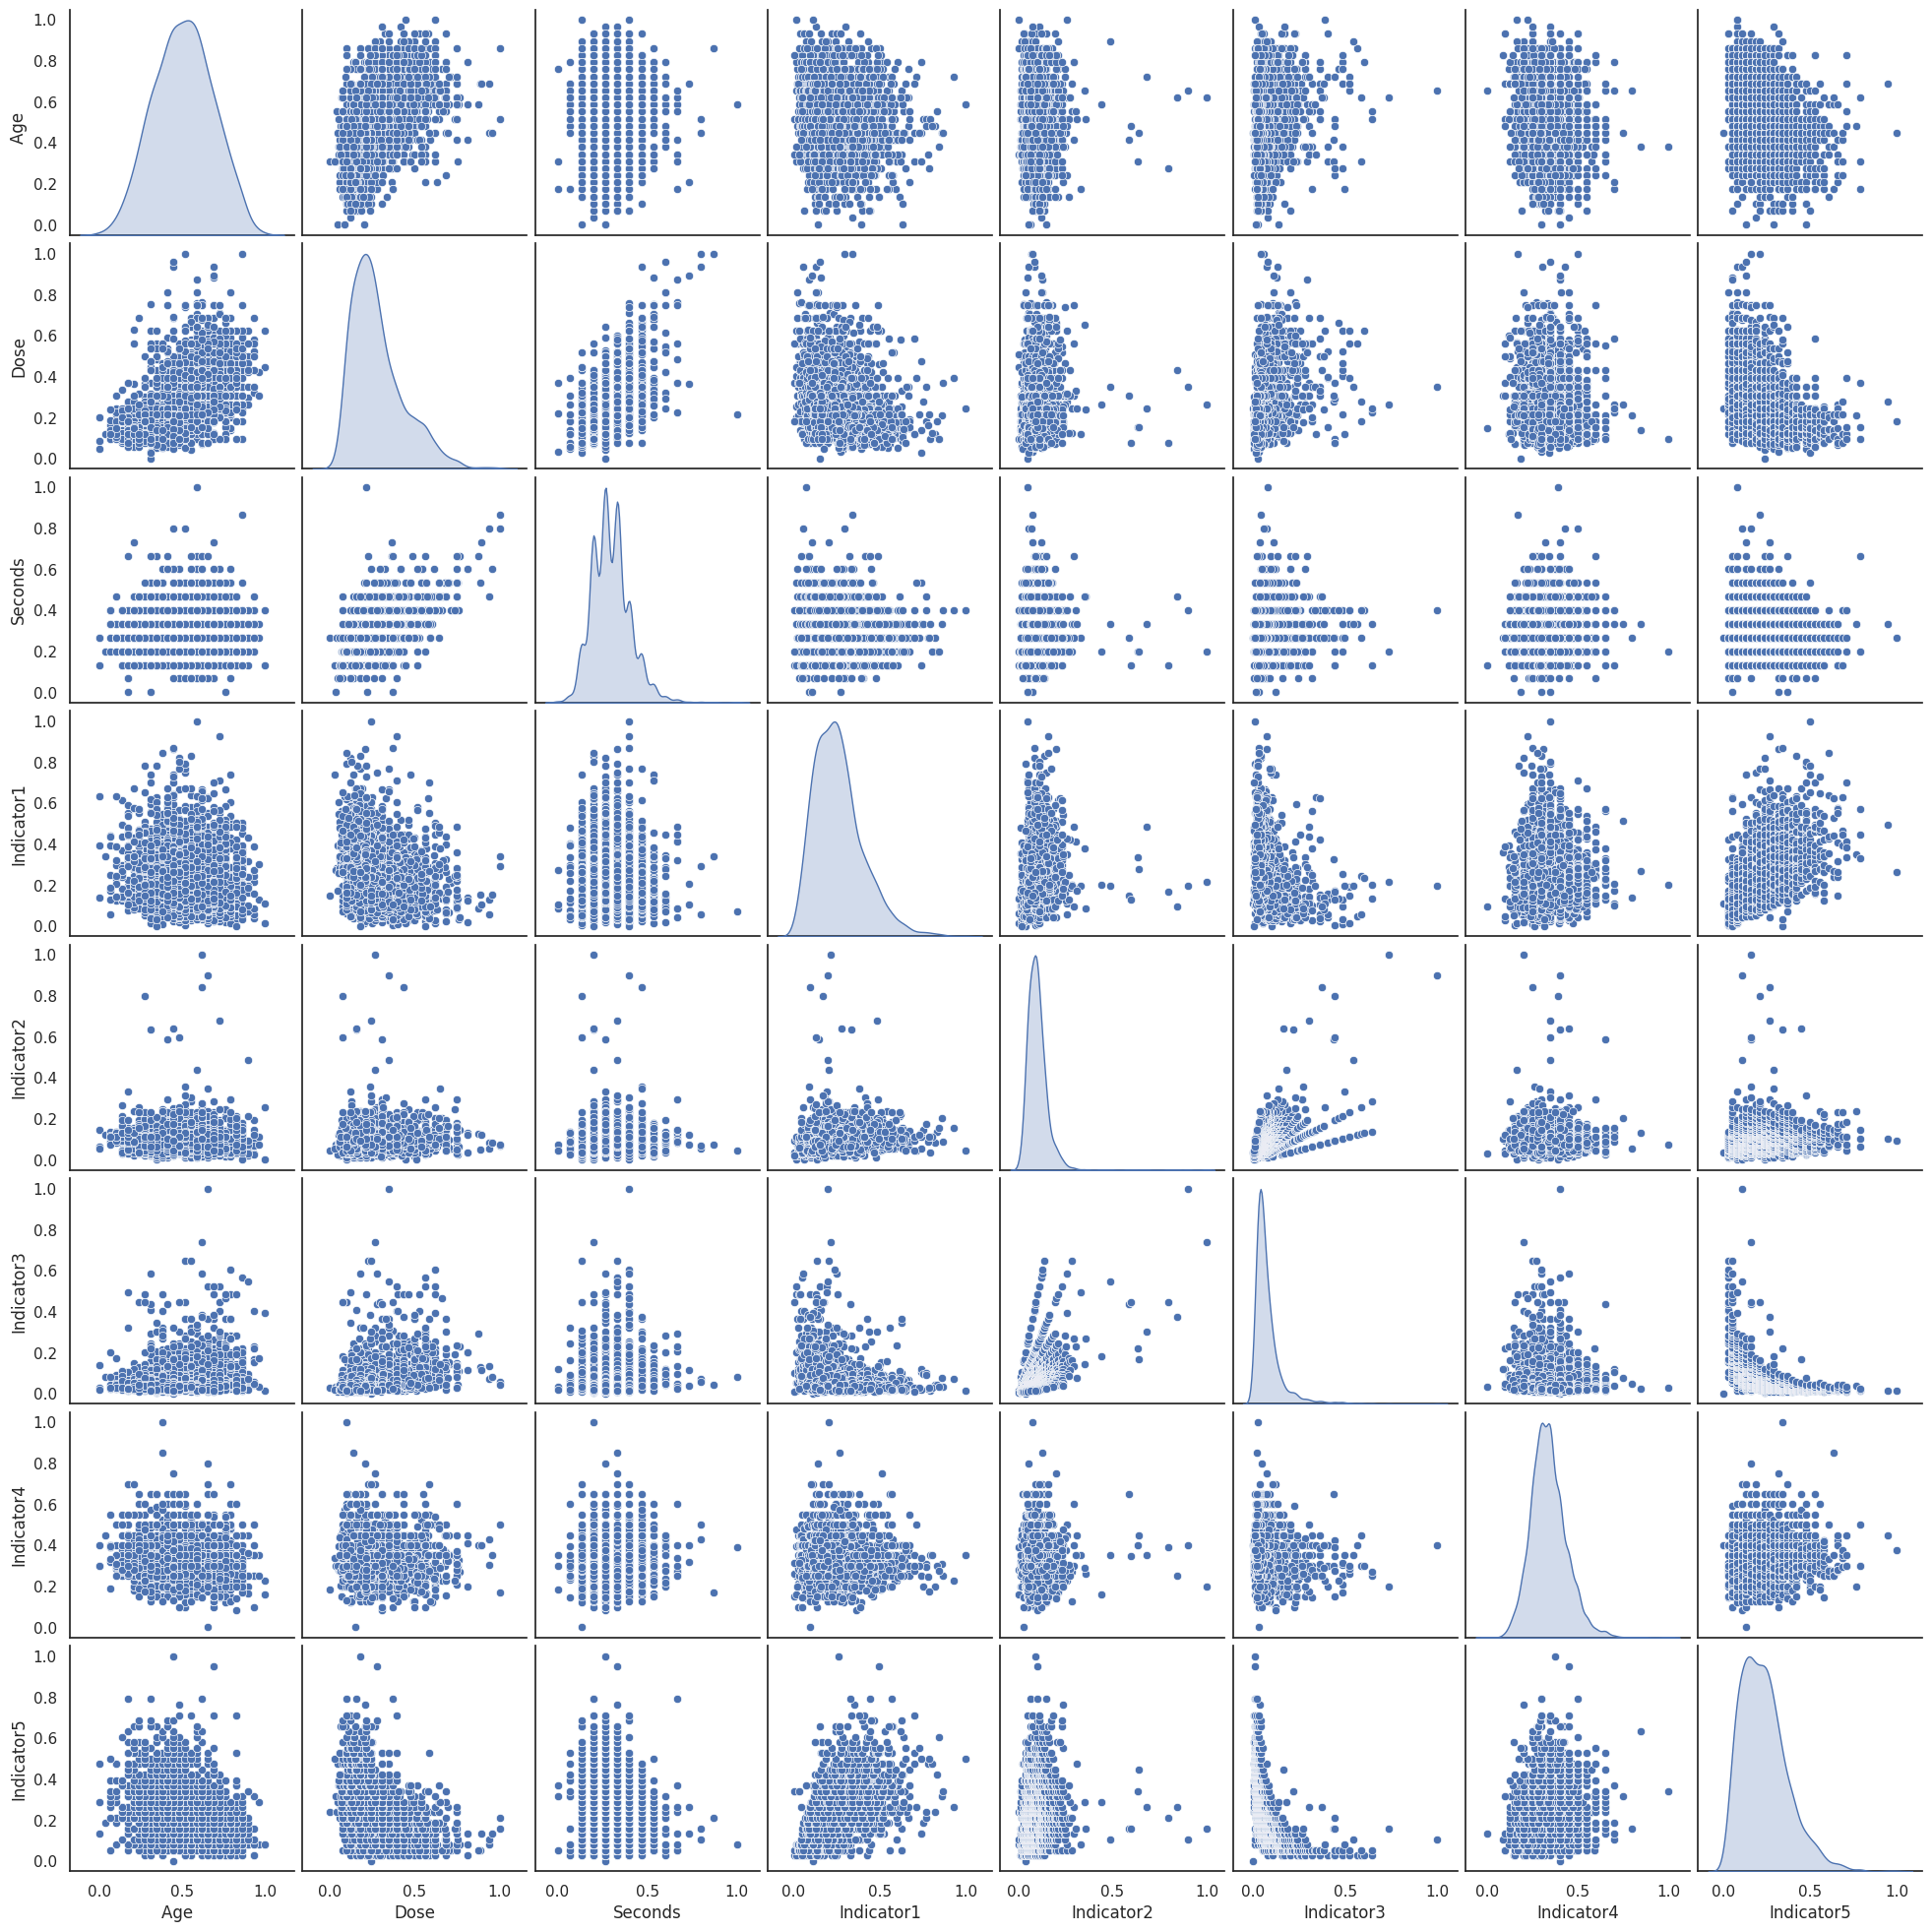

In [21]:
# Let's use our visualization libraries to visualize the correlation of our data
# Correlation basically shows us the relationship between two columns

# Data without the output column
input_columns = data.columns[:-1]
columns = list(input_columns[0:])

# Create pair plot
sns.pairplot(data[columns], diag_kind='kde')

# Second Feature Engineering Technique
## Principle Component Analysis PCA

In [29]:

# Perform PCA
pca = PCA(n_components=5)  # Specify the number of components to retain
data_pca = pca.fit_transform(data[columns])

# Optional: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
print("Total Explained Variance Ratio:", sum(explained_variance_ratio))

# Construct dataframe with PCA components
pca_columns = [f"PC{i+1}" for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data=data_pca, columns=pca_columns)

# Concatenate original dataframe with PCA components
data_with_pca = pd.concat([data, data_pca_df], axis=1)

data_with_pca.head()

Explained Variance Ratio: [0.40881447 0.19674666 0.14336237 0.08087668 0.06977099]
Total Explained Variance Ratio: 0.8995711661217061


,Age,Dose,Seconds,Indicator1,Indicator2,Indicator3,Indicator4,Indicator5,Outcome,PC1,PC2,PC3,PC4,PC5
0,0.448276,0.244755,0.266667,0.109740,0.037580,0.000000,0.400,0.000000,0.0,0.058405,-0.235043,-0.058883,-0.044391,0.062910
1,0.655172,0.181818,0.200000,0.049479,0.010082,0.080645,0.305,0.026316,0.0,0.166711,-0.174671,-0.260376,-0.035371,-0.002350
2,0.758621,0.360140,0.266667,0.018570,0.015582,0.104839,0.300,0.026316,0.0,0.353714,-0.121920,-0.175444,-0.063377,-0.035022
3,0.724138,0.559441,0.333333,0.023841,0.026581,0.153226,0.215,0.026316,0.0,0.466131,-0.119002,-0.017692,0.011803,-0.113135
4,0.551724,0.118881,0.066667,0.075356,0.028414,0.161290,0.250,0.026316,0.0,0.056841,-0.235070,-0.330543,0.074448,0.012588


# Thankyou for listening